In [ ]:
import socket

In [ ]:
socket.gethostname()

In [1]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places, geo_tools, evaltools as et
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [2]:
flist=['search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv']
slist=[78,78,78,78,67,67,67,67,67,67]
dfs=list()
for ii in range(0,len(flist)):
    print(flist[ii])
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/'+flist[ii],
        skiprows=slist[ii],header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'),na_values=' NaN'))

df=pd.concat(dfs,ignore_index=True)
df.drop(df[df.ChlQC != 1].index, inplace=True)
df.reset_index(inplace=True)
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dtUTC=dts)
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
print('totlen=',len(df))

search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv
search4979680/BritishColumb

newlen= 708992


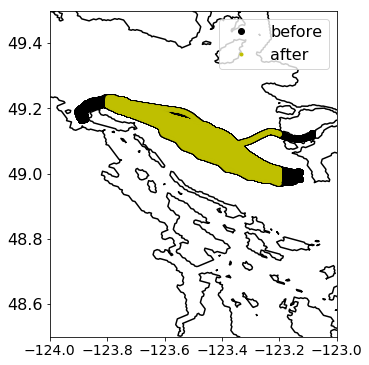

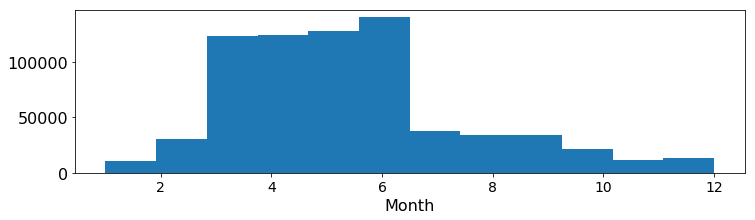

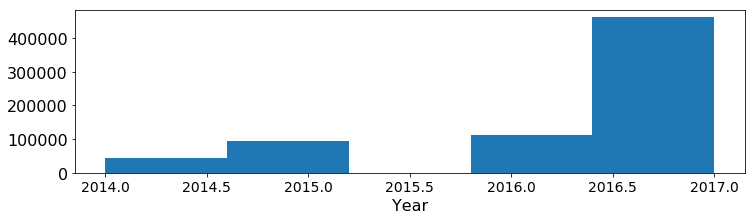

In [3]:
# chop off ends:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df['Lon'],df['Lat'], 'ko',label='before')
df.drop(df.loc[(df.Lon<-123.8)|(df.Lon>-123.2)].index,inplace=True)
ax.plot(df['Lon'],df['Lat'],'y.',label='after')
#ax.plot(df2.loc[60,['Lon']],df2.loc[60,['Lat']],'m.')
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48.5, 49.5)
ax.legend()
ax.set_xlim(-124., -123);

# chose only late night sailings
df.drop(df.loc[(df['dtUTC'].dt.hour>7)|(df['dtUTC'].dt.hour<6)].index,inplace=True)
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.month for xx in df['dtUTC']],12)
ax.set_xlabel('Month')
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.year for xx in df['dtUTC']],5)
ax.set_xlabel('Year')

print('newlen=',len(df))

In [4]:
df.tail()

,index,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC,dtUTC
9117831,9123293,2017-07-02T07:23:52.254Z,8.5262,1,5.5342,1,18.2172,1,49.003586,8,-123.200676,8,2017-07-02 07:23:52
9117832,9123294,2017-07-02T07:23:53.329Z,9.3884,1,5.8056,1,27.5196,1,49.003565,8,-123.200529,8,2017-07-02 07:23:53
9117833,9123295,2017-07-02T07:23:54.403Z,8.4304,1,5.3100,1,20.3388,1,49.003543,8,-123.200383,8,2017-07-02 07:23:54
9117834,9123296,2017-07-02T07:23:55.477Z,8.9094,1,5.6050,1,23.5824,1,49.003521,8,-123.200237,8,2017-07-02 07:23:55
9117835,9123297,2017-07-02T07:23:56.552Z,8.6220,1,5.5342,1,22.9296,1,49.003499,8,-123.200090,8,2017-07-02 07:23:56


In [5]:
df3=df.loc[(df.dtUTC>dt.datetime(2015,3,6))&(df.dtUTC<dt.datetime(2015,3,8))]

In [6]:
#len(df3),len(df3)/len(df2)

In [7]:
PATH= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2016,1,1) #end of current ONC file is <2017 7 23
flen=1
namfmt='nowcast'
filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}
fdict={'ptrc_T':1,'grid_T':1}

In [8]:
it0=dt.datetime.now()
print(it0)
data=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen,wrapSearch=True,wrapTol=12,method='ferry')
print(dt.datetime.now()-it0)

2019-02-11 17:52:43.501120


NameError: name 'df2' is not defined